- [ ] Fourier transform thing
    - [ ] 1. Do Fourier transform of image, select the top k moments
    - [ ] 2. See how many we need to classify properly

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def gen_testimage():
    x = np.arange(-500, 501, 1)
    X, Y = np.meshgrid(x, x)
    wavelength = 100
    angle = np.pi/9
    grating = np.sin(
        2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength
    )
    return grating

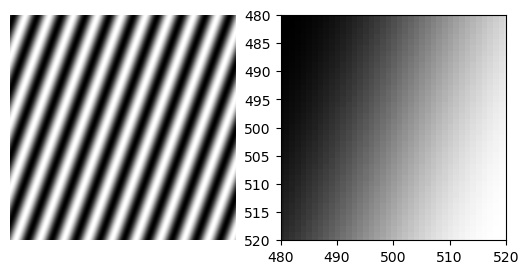

In [29]:
def fft2d(img):
    """
    Perform a 2D Fast Fourier Transform (FFT) on the input image.

    :param img: The input image to be transformed.
    :type img: numpy.ndarray

    :return: The transformed image.
    :rtype: numpy.ndarray
    """
    ft = np.fft.ifftshift(img)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

def ifft2d(ft):
    """
    Perform 2D inverse fast Fourier transform (IFFT) on the input array.

    Parameters:
    ft (ndarray): The input array containing the Fourier transform.

    Returns:
    ndarray: The inverse Fourier transform of the input array.

    """
    ift = np.fft.ifftshift(ft)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real 

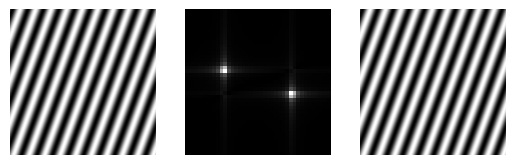

In [31]:
testim = gen_testimage()
ft = fft2d(testim)
ift = ifft2d(ft)

plt.set_cmap("gray")
plt.subplot(131)
plt.imshow(testim)
plt.axis("off")

plt.subplot(132)
plt.imshow(abs(ft))
plt.axis("off")
plt.xlim([480, 520])
plt.ylim([520, 480])

plt.subplot(133)
plt.imshow(ift)
plt.axis("off")
plt.show()